In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [21]:
df= pd.read_csv(r'C:\Users\Rathn\OneDrive\Documents\MTH522\Diabetes_Dataset_Ratnaraj_Marpu.csv')


In [22]:
df

,FIPDS,COUNTY,STATE,DIABETIC,OBESE,INACTIVE
0,1011,Bullock County,Alabama,9.4,18.7,17.0
1,2068,Denali Borough,Alaska,6.8,18.9,16.2
2,2105,Hoonah-Angoon Census Area,Alaska,7.3,19.4,15.0
3,2195,Petersburg Census Area,Alaska,9.2,17.2,17.8
4,2230,Skagway Municipality,Alaska,6.6,18.3,15.8
...,...,...,...,...,...,...
349,51820,Waynesboro City,Virginia,8.6,19.5,16.6
350,51830,Williamsburg City,Virginia,8.5,18.0,15.7
351,51840,Winchester City,Virginia,6.9,19.4,16.1
352,53055,San Juan County,Washington,4.5,19.3,11.9


In [23]:
type(df)

pandas.core.frame.DataFrame

In [24]:
df.columns

Index(['FIPDS', 'COUNTY', 'STATE', ' DIABETIC', 'OBESE', 'INACTIVE'], dtype='object')

In [25]:
df_cleaned = df.dropna(subset=[ ' DIABETIC','OBESE', 'INACTIVE'])

In [26]:
# Prepare the data for linear regression again
X_obesity_cleaned = df_cleaned[['OBESE']]
y_diabetic_cleaned = df_cleaned[' DIABETIC']

In [27]:
# Split the data into training and testing sets for obesity vs. diabetic
X_train_obesity, X_test_obesity, y_train_diabetic, y_test_diabetic = train_test_split(X_obesity_cleaned, y_diabetic_cleaned, test_size=0.2, random_state=0)

In [29]:
# Create and train the linear regression model for obesity vs. diabetic
from sklearn.linear_model import LinearRegression
model_obesity = LinearRegression()
model_obesity.fit(X_train_obesity, y_train_diabetic)

LinearRegression()

In [31]:
# Predictions and model evaluation for obesity vs. diabetic
from sklearn.metrics import r2_score,mean_squared_error
y_pred_obesity = model_obesity.predict(X_test_obesity)
mse_obesity = mean_squared_error(y_test_diabetic, y_pred_obesity)
r2_obesity = r2_score(y_test_diabetic, y_pred_obesity)

In [32]:
# Repeat the process for inactivity vs. diabetic
X_inactivity_cleaned = df_cleaned[['INACTIVE']]
X_train_inactivity, X_test_inactivity, y_train_diabetic, y_test_diabetic = train_test_split(X_inactivity_cleaned, y_diabetic_cleaned, test_size=0.2, random_state=0)

In [33]:
model_inactivity = LinearRegression()
model_inactivity.fit(X_train_inactivity, y_train_diabetic)

y_pred_inactivity = model_inactivity.predict(X_test_inactivity)
mse_inactivity = mean_squared_error(y_test_diabetic, y_pred_inactivity)
r2_inactivity = r2_score(y_test_diabetic, y_pred_inactivity)

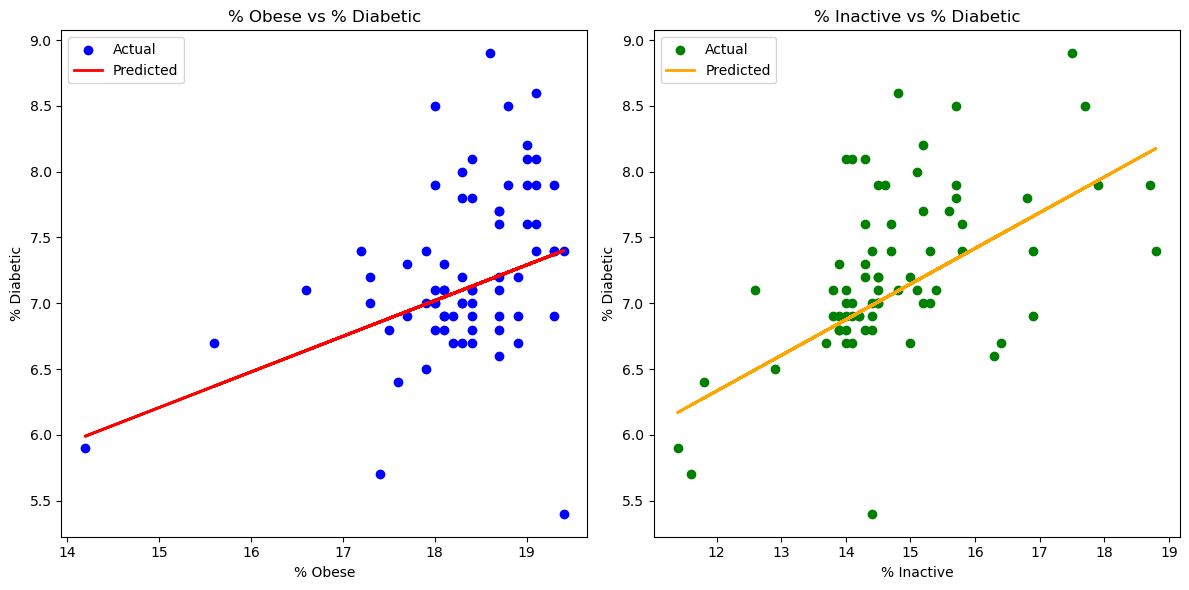

In [34]:
# Plotting the results again
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for % obese vs % diabetic
axes[0].scatter(X_test_obesity, y_test_diabetic, color='blue', label='Actual')
axes[0].plot(X_test_obesity, y_pred_obesity, color='red', linewidth=2, label='Predicted')
axes[0].set_title('% Obese vs % Diabetic')
axes[0].set_xlabel('% Obese')
axes[0].set_ylabel('% Diabetic')
axes[0].legend()

# Plot for % inactive vs % diabetic
axes[1].scatter(X_test_inactivity, y_test_diabetic, color='green', label='Actual')
axes[1].plot(X_test_inactivity, y_pred_inactivity, color='orange', linewidth=2, label='Predicted')
axes[1].set_title('% Inactive vs % Diabetic')
axes[1].set_xlabel('% Inactive')
axes[1].set_ylabel('% Diabetic')
axes[1].legend()

plt.tight_layout()
plt.show()

In [35]:
# Returning the MSE and R2 score for both models
(mse_obesity, r2_obesity, mse_inactivity, r2_inactivity)

(0.3584917200690736,
 0.10344167127977932,
 0.30729411504468623,
 0.23148267369483777)

In [39]:
from statsmodels.stats.diagnostic import het_breuschpagan


residuals_obesity = y_test_diabetic - y_pred_obesity
bp_test_obesity = het_breuschpagan(residuals_obesity, X_test_obesity)

# Perform the Breusch-Pagan test for % Inactive vs % Diabetic
residuals_inactivity = y_test_diabetic - y_pred_inactivity
bp_test_inactivity = het_breuschpagan(residuals_inactivity, X_test_inactivity)

bp_test_obesity, bp_test_inactivity

ValueError: The Breusch-Pagan test requires exog to have at least two columns where one is a constant.